Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [221]:
df=pd.read_excel(r'C:\Users\polasasuresh\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [222]:
df.shape

(10683, 11)

There are 10683 rows and 11 columns present in the dataset

In [223]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All the columns are object typeand one column is integer type 

In [224]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


There are 10 columns with object type and 1 column with ineger type

# EDA

In [226]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


There are null values in the Route and Total_Stops columns

In [227]:
#percentages of duplicates
(df.duplicated()).sum()/len(df)*100

2.059346625479734

In [228]:
#droping duplicates
df.drop_duplicates(keep='first',inplace=True)

In [229]:
#Removing null values
df.dropna(inplace=True)

Date_of_journey is a object type we have to convert this type to date type

In [230]:

df['journey_day']=pd.to_datetime(df.Date_of_Journey).dt.day

In [231]:
df['Journey_month']=pd.to_datetime(df['Date_of_Journey']).dt.month

In [232]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [233]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
journey_day         int64
Journey_month       int64
dtype: object

In [234]:
#now we can drop Date_of_Journey
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [235]:
#Departure time is when a plane leaves the gate
#similar to Date_of_Journey we can extract values from Dep_Time

#Extracting Hours
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour

#Extracting Minutes
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

#Now we can drop Dep_Time as it is of no use
df.drop(['Dep_Time'],axis=1,inplace=True)


In [236]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,Journey_month,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [237]:

#Arrival time is when the plane pulls up to the gate
#similar to Date_of_Journey we can extract values from Arrival_Time

#extracting Hours
df['Arrival_hour']=pd.to_datetime(df.Arrival_Time).dt.hour

#Extracting Minutes
df['Arrival_Min']=pd.to_datetime(df.Arrival_Time).dt.minute

#Now we can drop Arrival_Time as it is of no use
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [238]:

def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
df['Duration_hours']=df.Duration.apply(lambda x:get_duration(x)[0])
df['Duration_mins']=df.Duration.apply(lambda x:get_duration(x)[1])


In [239]:
#Droping Duration column
df.drop(['Duration'],axis=1,inplace=True)

In [240]:
#Droping Additional_Info column
df.drop(['Additional_Info'],axis=1,inplace=True)

In [241]:
#As we know Route and Total_stops are related we can drop Route
df.drop(['Route'],axis=1,inplace=True)

# Handling Categeorical Data

In [242]:

df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

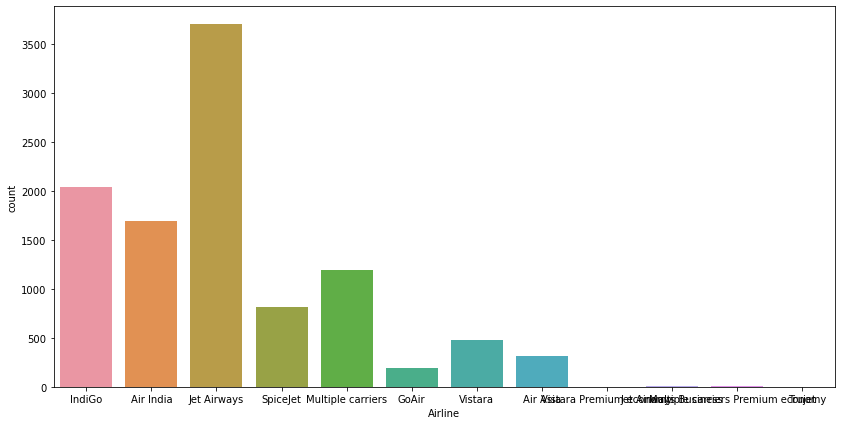

In [243]:
plt.figure(figsize=(14,7))
sns.countplot(df['Airline'],data=df)


Jet Airways is having highest values

<AxesSubplot:>

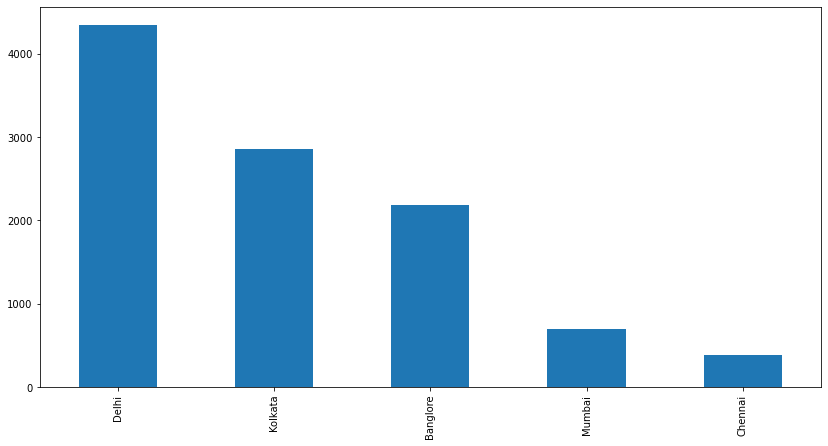

In [244]:
plt.figure(figsize=(14,7))
df['Source'].value_counts().plot.bar()

From Delhi Airport the flights are Depaturing more

<AxesSubplot:>

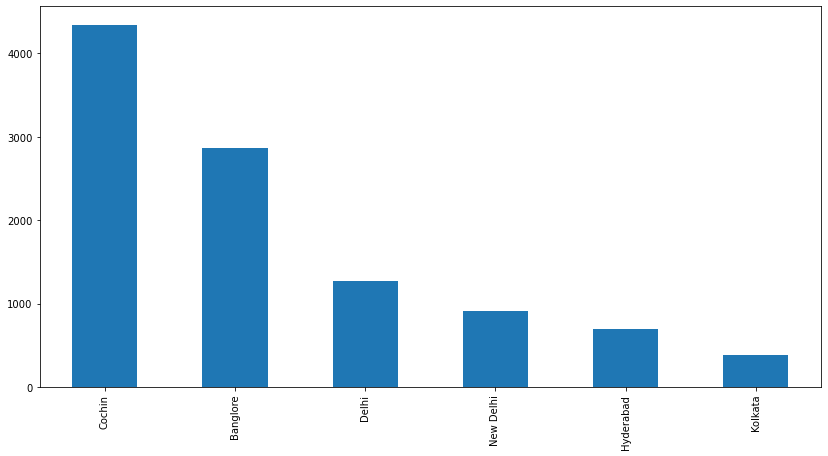

In [245]:
plt.figure(figsize=(14,7))
df['Destination'].value_counts().plot.bar()








More flights are going to Cochin Airport

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

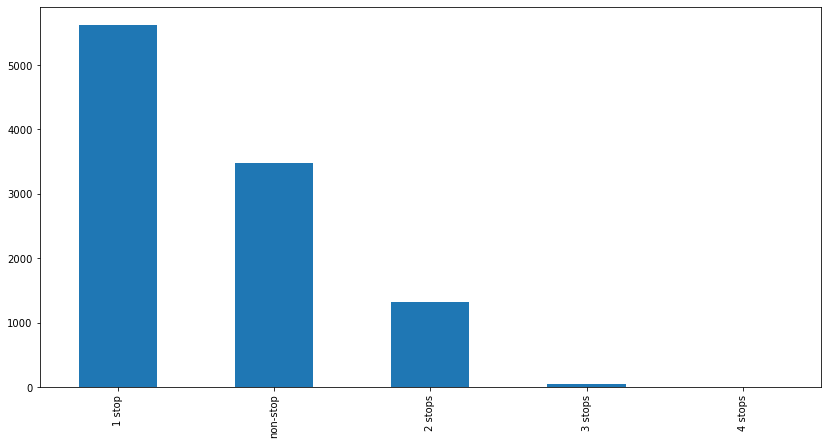

In [246]:
plt.figure(figsize=(14,7))
df['Total_Stops'].value_counts().plot.bar()
df['Total_Stops'].value_counts()

More flights are stoping at 1 place,and non-stop flights are also more

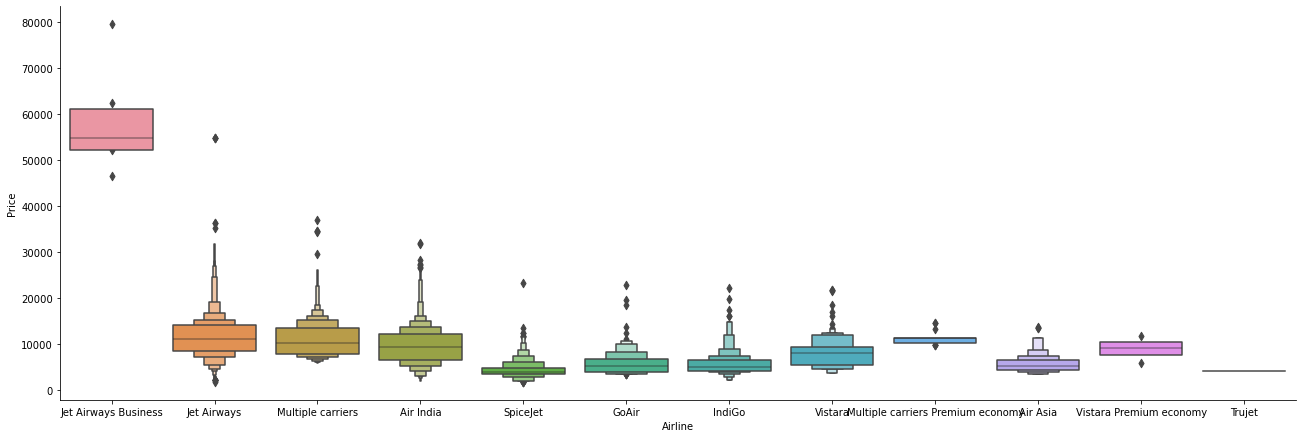

In [247]:
sns.catplot(y="Price",x="Airline",data=df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

'JetAirwaysBusiness' has the highest price range.Other airlines price also varies

<Figure size 1008x504 with 0 Axes>

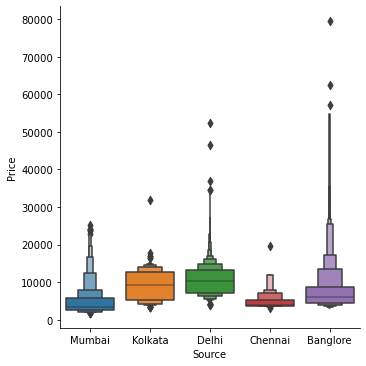

In [248]:
plt.figure(figsize=(14,7))
sns.catplot(y="Price",x="Source",data=df.sort_values("Source",ascending=False),kind="boxen")
plt.show()

Bangolore has highest values

<Figure size 1008x504 with 0 Axes>

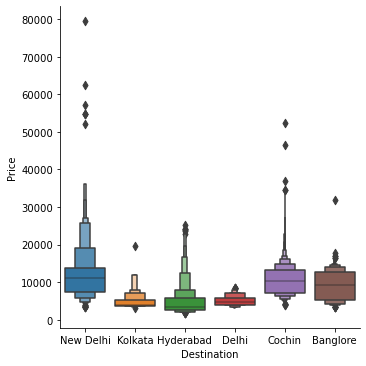

In [249]:
plt.figure(figsize=(14,7))
sns.catplot(y="Price",x="Destination",data=df.sort_values("Destination",ascending=False),kind="boxen")
plt.show()

# Correlation

In [250]:
df.corr()

,Price,journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins
Price,1.000000,-0.171142,0.008662,0.005155,-0.024155,0.031023,-0.086163,0.504200,-0.131664
journey_day,-0.171142,1.000000,-0.265200,-0.007617,-0.013512,-0.001133,-0.019622,-0.046812,-0.007709
Journey_month,0.008662,-0.265200,1.000000,0.028462,0.001922,-0.003041,-0.023619,0.056828,-0.021506
Dep_Hour,0.005155,-0.007617,0.028462,1.000000,-0.015068,-0.003827,0.072989,-0.000648,-0.018843
Dep_min,-0.024155,-0.013512,0.001922,-0.015068,1.000000,0.046564,-0.021353,-0.022147,0.089269
Arrival_hour,0.031023,-0.001133,-0.003041,-0.003827,0.046564,1.000000,-0.152036,0.065586,-0.116687
Arrival_Min,-0.086163,-0.019622,-0.023619,0.072989,-0.021353,-0.152036,1.000000,-0.075942,0.156176
Duration_hours,0.504200,-0.046812,0.056828,-0.000648,-0.022147,0.065586,-0.075942,1.000000,-0.133999
Duration_mins,-0.131664,-0.007709,-0.021506,-0.018843,0.089269,-0.116687,0.156176,-0.133999,1.000000


<AxesSubplot:>

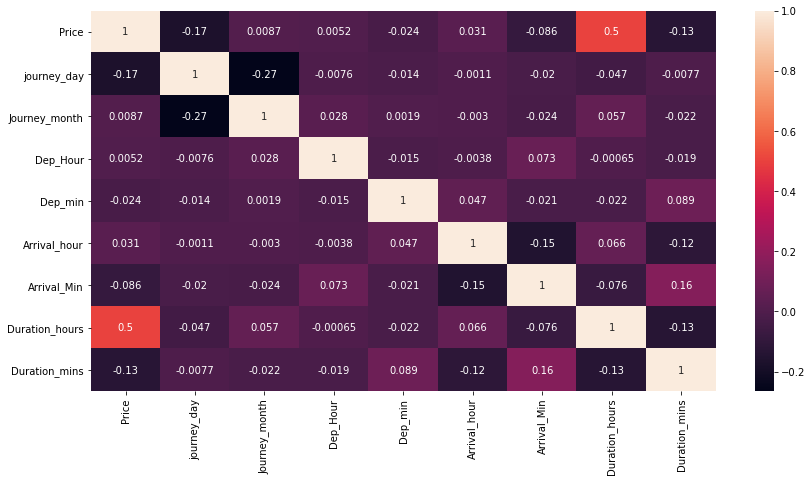

In [251]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

There is less correlation between features

# Encoding

for Nominal data we use OneHotEncoding
for Ordinal Encoding we use Label Encoding

In [252]:
Airline=pd.get_dummies(df.Airline,drop_first=True)
Source=pd.get_dummies(df.Source,drop_first=True)
Destination=pd.get_dummies(df.Destination,drop_first=True)

In [253]:
#Total_stops is ordinal type we use LAbelEncoder
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
df.head(3)

,Airline,Source,Destination,Total_Stops,Price,journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0


In [254]:
df.shape

(10462, 13)

In [255]:
df.Total_Stops

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10462, dtype: int64

In [256]:
#concatenate dataframe
df=pd.concat([df,Airline,Source,Destination],axis=1)

In [257]:
#we can drop Airline,source,Destination from dataset
df.drop(["Airline","Source","Destination"],axis=1,inplace=True)
df.head()

,Total_Stops,Price,journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [258]:
df.head()

,Total_Stops,Price,journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


# Test set

In [259]:
df1=pd.read_excel(r"C:\Users\polasasuresh\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [260]:
df1.shape

(2671, 10)

In [261]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

Test dataset doesnot consist Price column

In [262]:

#droping duplicates and null values
#percentages of duplicates
(df1.duplicated()).sum()/len(df1)*100

0.9734181954324224

In [263]:
#droping duplicates
df1.drop_duplicates(keep='first',inplace=True)

In [264]:
#Removing null values
df1.dropna(inplace=True)

In [265]:
df1['journey_day']=pd.to_datetime(df1.Date_of_Journey).dt.day


In [266]:
df1['Journey_month']=pd.to_datetime(df1['Date_of_Journey']).dt.month

In [267]:

#now we can drop Date_of_Journey
df1.drop(['Date_of_Journey'],axis=1,inplace=True)

In [268]:

#Departure time is when a plane leaves the gate
#similar to Date_of_Journey we can extract values from Dep_Time

#Extracting Hours
df1['Dep_Hour']=pd.to_datetime(df1['Dep_Time']).dt.hour

#Extracting Minutes
df1['Dep_min']=pd.to_datetime(df1['Dep_Time']).dt.minute

#Now we can drop Dep_Time as it is of no use
df1.drop(['Dep_Time'],axis=1,inplace=True)


In [269]:
#Arrival time is when the plane pulls up to the gate
#similar to Date_of_Journey we can extract values from Arrival_Time

#extracting Hours
df1['Arrival_hour']=pd.to_datetime(df1.Arrival_Time).dt.hour

#Extracting Minutes
df1['Arrival_Min']=pd.to_datetime(df1.Arrival_Time).dt.minute

#Now we can drop Arrival_Time as it is of no use
df1.drop(['Arrival_Time'],axis=1,inplace=True)

In [270]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
df1['Duration_hours']=df1.Duration.apply(lambda x:get_duration(x)[0])
df1['Duration_mins']=df1.Duration.apply(lambda x:get_duration(x)[1])


In [271]:
#Droping Duration column
df1.drop(['Duration'],axis=1,inplace=True)
#Droping Additional_Info column
df1.drop(['Additional_Info'],axis=1,inplace=True)

#As we know Route and Total_stops are related we can drop Route
df1.drop(['Route'],axis=1,inplace=True)

# Encoding

In [272]:
Airline=pd.get_dummies(df1.Airline,drop_first=True)
Source=pd.get_dummies(df1.Source,drop_first=True)
Destination=pd.get_dummies(df1.Destination,drop_first=True)

In [273]:

#Total_stops is ordinal type we use LAbelEncoder
df1.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
df1.head(3)

,Airline,Source,Destination,Total_Stops,journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45


In [274]:
df1.shape

(2645, 12)

In [275]:
#concatenate dataframe
df1_Test=pd.concat([df1,Airline,Source,Destination],axis=1)

In [276]:
#we can drop Airline,source,Destination from dataset
df1_Test.drop(["Airline","Source","Destination"],axis=1,inplace=True)
df1_Test.head()

,Total_Stops,journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [277]:
df.describe()

,Total_Stops,Price,journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,...,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,0.802332,9026.790289,12.630090,5.534601,12.478494,24.404989,13.387689,24.719939,10.026190,28.210189,...,0.000287,0.036418,0.415313,0.273370,0.066622,0.415313,0.120914,0.066622,0.036418,0.087364
std,0.660609,4624.849541,8.791635,2.995344,5.727227,18.815719,6.855547,16.570450,8.378023,16.879185,...,0.016932,0.187336,0.492799,0.445711,0.249378,0.492799,0.326043,0.249378,0.187336,0.282381
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5224.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8266.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12344.750000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [278]:
df.skew()

Total_Stops                            0.332309
Price                                  1.857490
journey_day                            0.375990
Journey_month                          0.630882
Dep_Hour                               0.108306
Dep_min                                0.171301
Arrival_hour                          -0.378978
Arrival_Min                            0.110802
Duration_hours                         0.892650
Duration_mins                         -0.085870
Air India                              1.835779
GoAir                                  7.138721
IndiGo                                 1.537610
Jet Airways                            0.612250
Jet Airways Business                  41.727287
Multiple carriers                      2.424511
Multiple carriers Premium economy     28.319612
SpiceJet                               3.150260
Trujet                               102.283919
Vistara                                4.352050
Vistara Premium economy               59

some of the columns are not under the skewness threshold value

In [279]:
df1_Test.skew()

Total_Stops                           0.329736
journey_day                           0.479218
Journey_month                         0.589883
Dep_Hour                              0.089146
Dep_min                               0.129932
Arrival_hour                         -0.447350
Arrival_Min                           0.113229
Duration_hours                        0.901931
Duration_mins                        -0.102128
Air India                             1.822543
GoAir                                 7.473850
IndiGo                                1.561257
Jet Airways                           0.699698
Jet Airways Business                 36.345548
Multiple carriers                     2.205876
Multiple carriers Premium economy    29.659154
SpiceJet                              3.132543
Vistara                               4.192264
Vistara Premium economy              36.345548
Chennai                               5.686169
Delhi                                 0.299106
Kolkata      

some of the columns are not under the skewness threshold value

# Outliers Checking

Total_Stops                             AxesSubplot(0.125,0.125;0.021648x0.755)
Price                                AxesSubplot(0.150978,0.125;0.021648x0.755)
journey_day                          AxesSubplot(0.176955,0.125;0.021648x0.755)
Journey_month                        AxesSubplot(0.202933,0.125;0.021648x0.755)
Dep_Hour                             AxesSubplot(0.228911,0.125;0.021648x0.755)
Dep_min                              AxesSubplot(0.254888,0.125;0.021648x0.755)
Arrival_hour                         AxesSubplot(0.280866,0.125;0.021648x0.755)
Arrival_Min                          AxesSubplot(0.306844,0.125;0.021648x0.755)
Duration_hours                       AxesSubplot(0.332821,0.125;0.021648x0.755)
Duration_mins                        AxesSubplot(0.358799,0.125;0.021648x0.755)
Air India                            AxesSubplot(0.384777,0.125;0.021648x0.755)
GoAir                                AxesSubplot(0.410754,0.125;0.021648x0.755)
IndiGo                               Axe

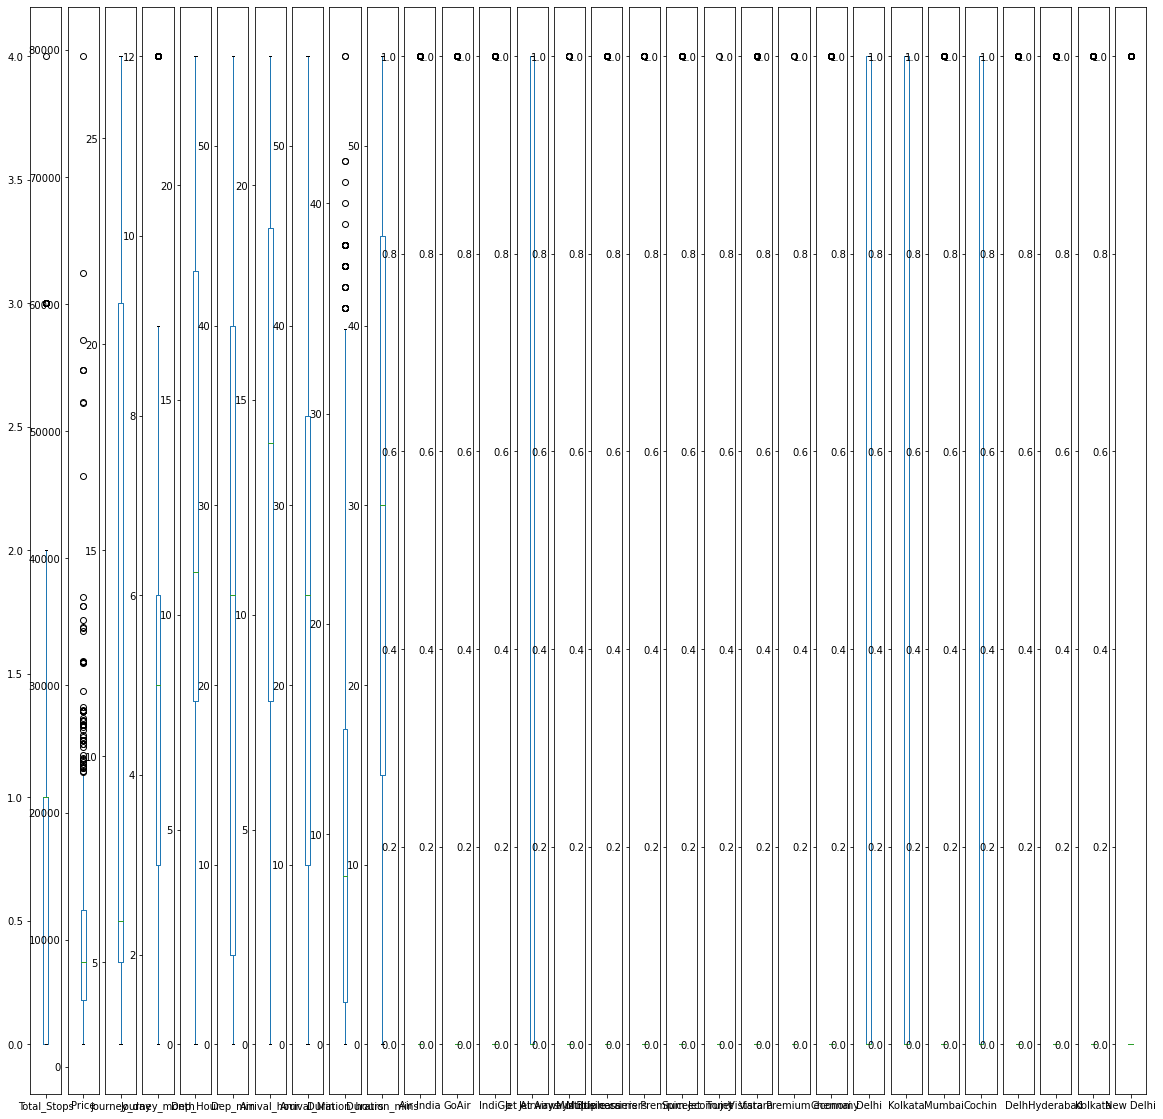

In [280]:
df.plot(kind="box",subplots=True,figsize=(20,20))

Total_Stops                             AxesSubplot(0.125,0.125;0.0232036x0.755)
journey_day                          AxesSubplot(0.152844,0.125;0.0232036x0.755)
Journey_month                        AxesSubplot(0.180689,0.125;0.0232036x0.755)
Dep_Hour                             AxesSubplot(0.208533,0.125;0.0232036x0.755)
Dep_min                              AxesSubplot(0.236377,0.125;0.0232036x0.755)
Arrival_hour                         AxesSubplot(0.264222,0.125;0.0232036x0.755)
Arrival_Min                          AxesSubplot(0.292066,0.125;0.0232036x0.755)
Duration_hours                        AxesSubplot(0.31991,0.125;0.0232036x0.755)
Duration_mins                        AxesSubplot(0.347754,0.125;0.0232036x0.755)
Air India                            AxesSubplot(0.375599,0.125;0.0232036x0.755)
GoAir                                AxesSubplot(0.403443,0.125;0.0232036x0.755)
IndiGo                               AxesSubplot(0.431287,0.125;0.0232036x0.755)
Jet Airways                 

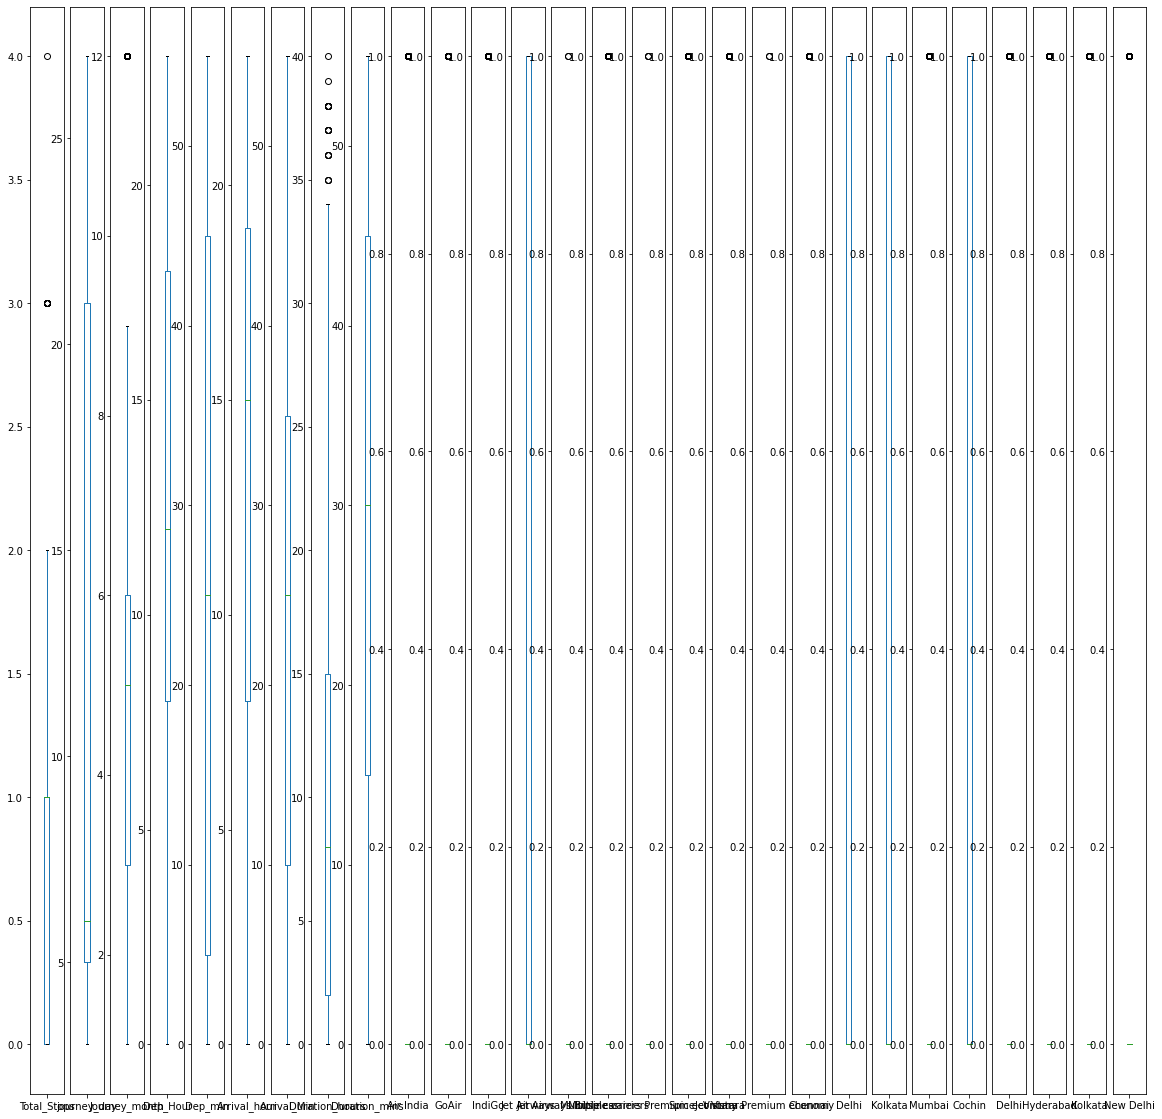

In [281]:
df1_Test.plot(kind="box",subplots=True,figsize=(20,20))

Duration_hours has outliers in both train and test datasets

# Removing Outliers

In [282]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df

,Total_Stops,Price,journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
9,1,8625,27,5,11,25,19,15,7,50,...,0,0,1,0,0,1,0,0,0,0
10,1,8907,6,1,9,45,23,0,13,15,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,1,9794,5,1,10,20,19,0,8,40,...,0,0,1,0,0,1,0,0,0,0
10678,0,4107,4,9,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0


# seperating columns into features and target

In [284]:
x=df.drop("Price",axis=1)
y=df["Price"]

# Transforming data to remove skewness weuse power_transform method

In [285]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.69914818, -0.89699061, -1.94613346, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.69914818, -0.66177858,  1.11002681, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10662591, -0.89699061,  1.87630472, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5757032 ,  1.32443588, -0.50112323, ...,  0.        ,
         0.        ,  0.        ],
       [-1.5757032 ,  1.32443588, -0.50112323, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.69914818, -0.89699061,  1.11002681, ...,  0.        ,
         0.        ,  0.        ]])

In [286]:
pd.DataFrame(x).skew()

0    -0.055416
1     0.031005
2    -0.021700
3    -0.118339
4    -0.341537
5    -0.392494
6    -0.359545
7    -0.072693
8    -0.417232
9     1.723651
10    0.000000
11    1.443534
12    0.338369
13    0.000000
14    1.843398
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21   -0.214427
22    0.772495
23    0.000000
24   -0.214427
25    2.243188
26    0.000000
27    0.000000
28    0.000000
dtype: float64

In [287]:
#data is skewed

# scaling the data using StandardScaler

In [288]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[ 1.69914818, -0.89699061, -1.94613346, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.69914818, -0.66177858,  1.11002681, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10662591, -0.89699061,  1.87630472, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5757032 ,  1.32443588, -0.50112323, ...,  0.        ,
         0.        ,  0.        ],
       [-1.5757032 ,  1.32443588, -0.50112323, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.69914818, -0.89699061,  1.11002681, ...,  0.        ,
         0.        ,  0.        ]])

here we have scaled all the columns into the same scale

In [289]:
x=pd.DataFrame(x1,columns=pd.DataFrame(x).columns)
x

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.699148,-0.896991,-1.946133,-1.399074,1.227165,-0.084243,-0.292727,-0.378969,-0.020550,2.181663,...,0.0,0.0,-1.112920,1.458141,0.0,-1.112920,-0.381120,0.0,0.0,0.0
1,1.699148,-0.661779,1.110027,-0.601321,0.343577,-1.355631,0.263593,0.992349,-1.776679,-0.458366,...,0.0,0.0,0.898537,-0.685805,0.0,0.898537,-0.381120,0.0,0.0,0.0
2,0.106626,-0.896991,1.876305,0.951069,-0.841684,1.377017,0.507354,-0.745153,-0.020550,-0.458366,...,0.0,0.0,-1.112920,1.458141,0.0,-1.112920,-0.381120,0.0,0.0,0.0
3,0.106626,1.324436,-0.128494,-0.233693,0.343577,0.788200,-0.292727,-0.378969,1.163840,-0.458366,...,0.0,0.0,0.898537,-0.685805,0.0,0.898537,-0.381120,0.0,0.0,0.0
4,0.106626,-0.661779,-1.946133,-0.601321,1.073193,1.377017,-1.653887,0.418619,-0.585737,2.181663,...,0.0,0.0,0.898537,-0.685805,0.0,0.898537,-0.381120,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7304,0.106626,-0.896991,-1.946133,-0.415438,0.116694,0.788200,-1.653887,-0.220794,0.717248,-0.458366,...,0.0,0.0,0.898537,-0.685805,0.0,0.898537,-0.381120,0.0,0.0,0.0
7305,-1.575703,-1.179074,1.110027,1.110562,1.373276,1.229347,0.263593,-1.520718,0.236746,-0.458366,...,0.0,0.0,-1.112920,1.458141,0.0,-1.112920,-0.381120,0.0,0.0,0.0
7306,-1.575703,1.324436,-0.501123,1.268095,1.073193,1.377017,-0.000637,-1.520718,0.481963,2.181663,...,0.0,0.0,-1.112920,1.458141,0.0,-1.112920,-0.381120,0.0,0.0,0.0
7307,-1.575703,1.324436,-0.501123,-0.791865,0.116694,-0.371470,-0.000637,-1.216039,-1.776679,-0.458366,...,0.0,0.0,-1.112920,-0.685805,0.0,-1.112920,2.623847,0.0,0.0,0.0


# Checking VIF

In [290]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif["features"]=pd.DataFrame(x1).columns
vif

,vif,features
0,2.955595,0
1,1.047019,1
2,1.043021,2
3,1.094265,3
4,1.094807,4
5,1.152365,5
6,1.205883,6
7,2.859300,7
8,1.109066,8
9,5.000521,9


In [291]:
#Delhi and Kolkata is repeated 2 times so There is multi collinearity exists we can drop These two columns
df.drop(['Delhi','Kolkata'],axis=1,inplace=True)

# Model Building

since our target variable is a continuous variable so we use Linear Regression

In [292]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [294]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At Random State {i} the training accuracy is:",r2_score(y_train,pred_train))
    print(f"At Random State {i} the testing accuracy is:",r2_score(y_test,pred_test))
    print("\n")

At Random State 0 the training accuracy is: 0.5817262456203193
At Random State 0 the testing accuracy is: 0.5334703982274511


At Random State 1 the training accuracy is: 0.5724426811618641
At Random State 1 the testing accuracy is: 0.5696709905922734


At Random State 2 the training accuracy is: 0.5713299982169081
At Random State 2 the testing accuracy is: 0.575499857487743


At Random State 3 the training accuracy is: 0.5728678569406482
At Random State 3 the testing accuracy is: 0.5688241571663755


At Random State 4 the training accuracy is: 0.5721773420929278
At Random State 4 the testing accuracy is: 0.5702107534076689


At Random State 5 the training accuracy is: 0.5670086173251974
At Random State 5 the testing accuracy is: 0.5926504972255031


At Random State 6 the training accuracy is: 0.5715191795341199
At Random State 6 the testing accuracy is: 0.5743613069660556


At Random State 7 the training accuracy is: 0.5730020506289929
At Random State 7 the testing accuracy is: 0.5686

At Random State 67 the training accuracy is: 0.5710651830826394
At Random State 67 the testing accuracy is: 0.5760210905232251


At Random State 68 the training accuracy is: 0.5673535220947854
At Random State 68 the testing accuracy is: 0.5915366936366866


At Random State 69 the training accuracy is: 0.5717945338848579
At Random State 69 the testing accuracy is: 0.5732702959820356


At Random State 70 the training accuracy is: 0.5688823419302826
At Random State 70 the testing accuracy is: 0.5852693633164232


At Random State 71 the training accuracy is: 0.5678237340818371
At Random State 71 the testing accuracy is: 0.5877977751115289


At Random State 72 the training accuracy is: 0.5748078684017679
At Random State 72 the testing accuracy is: 0.561860480183521


At Random State 73 the training accuracy is: 0.5719338894648099
At Random State 73 the testing accuracy is: 0.5726923425110125


At Random State 74 the training accuracy is: 0.5710383832177972
At Random State 74 the testing acc

In [295]:
pred_test=lr.predict(x_test)

In [296]:
r2_score(pred_test,y_test)

0.23579097417136163

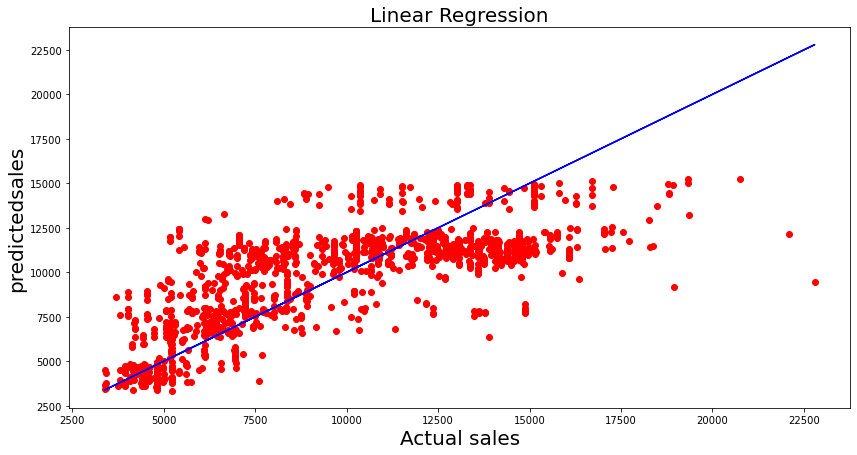

In [297]:
plt.figure(figsize=(14,7))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales",fontsize=20)
plt.ylabel("predictedsales",fontsize=20)
plt.title("Linear Regression",fontsize=20)
plt.show()

In [298]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [304]:
def regressor(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=63)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("Mean squared Error is:",mean_squared_error(y_test,pred))
    print("Meanabsoluteerror",mean_absolute_error(y_test,pred))
    print("r2_score is:",r2_score(y_test,pred))
    print("cross_validation_score is:",cross_val_score(model,x,y,cv=5).mean())

# LinearRegression

In [305]:
model=LinearRegression()
regressor(model,x,y)

Mean squared Error is: 6184405.896388756
Meanabsoluteerror 1942.3307488048385
r2_score is: 0.5652878728099782
cross_validation_score is: 0.569880504076514


# L1--LassoRegression

In [306]:
model=Lasso(alpha=0.001)
regressor(model,x,y)

Mean squared Error is: 6184406.543105997
Meanabsoluteerror 1942.3307998444975
r2_score is: 0.5652878273511528
cross_validation_score is: 0.5698804988932835


# L2--Ridge Regression

In [307]:
model=Ridge(alpha=0.0001)
regressor(model,x,y)

Mean squared Error is: 6184405.930183807
Meanabsoluteerror 1942.3307624689203
r2_score is: 0.565287870434468
cross_validation_score is: 0.5698805039363546


# ElasticNetRegression

In [308]:
model=ElasticNet(alpha=0.0001)
regressor(model,x,y)

Mean squared Error is: 6184509.7831383785
Meanabsoluteerror 1942.3705984759654
r2_score is: 0.5652805704383888
cross_validation_score is: 0.5698796544694547


# DecissionTreeRegressor

In [309]:
model=DecisionTreeRegressor(random_state=63)
regressor(model,x,y)

Mean squared Error is: 5116205.552929967
Meanabsoluteerror 1448.9101801185593
r2_score is: 0.6403734430894507
cross_validation_score is: 0.6251578812590999


# RandomForestRegressor

In [310]:
model=RandomForestRegressor()
regressor(model,x,y)

Mean squared Error is: 3424115.869670093
Meanabsoluteerror 1270.7886068872226
r2_score is: 0.7593132277558663
cross_validation_score is: 0.7543971173575158


# KNN

In [311]:
model=KNeighborsRegressor()
regressor(model,x,y)

Mean squared Error is: 5862342.360300958
Meanabsoluteerror 1827.3396716826262
r2_score is: 0.587926251856997
cross_validation_score is: 0.5984225614905355


# GradientBoostRegressor

In [312]:
model=GradientBoostingRegressor()
regressor(model,x,y)

Mean squared Error is: 3726195.5878501283
Meanabsoluteerror 1508.2988188344648
r2_score is: 0.7380795443477826
cross_validation_score is: 0.7362381236698269


# AdaBoostRegressor

In [313]:
model=AdaBoostRegressor()
regressor(model,x,y)

Mean squared Error is: 6098218.072795803
Meanabsoluteerror 2116.5091972678647
r2_score is: 0.5713461575926522
cross_validation_score is: 0.5669996691902963


# HyperParameterTuning

In [314]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
params={'n_estimators':[1,2,3],     
        'criterion':['squared_error','mse'],
        'max_features':['auto','sqrt','log2'],
        #'max_samples':[50,100,250,500,1000],
        #'min_samples_split':[2,4,10]
       }
rf=RandomForestRegressor()
clf=GridSearchCV(rf,params)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 3}


In [315]:
rf=RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=3)
rf.fit(x,y)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2_score',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

r2_score 87.92881208579354
cross val score: 70.83196901968


Conclusion: The r2_score for Random Forest Regressor is better after hyperTuning, which is 87% with cross validation score 71% ,So,we accept this model

# Saving the Model

In [316]:
import pickle
filename='flightpriceprediction.pkl'
pickle.dump(rfc,open(filename,'wb'))

In [317]:
#predict the values
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("Predicted Price",pred)
print("actual price",y_test)

Predicted Price [ 5677.5        11180.9025     11029.5582381  ...  7619.62
  9620.71466667 11151.83      ]
actual price 2848      5406
10500     7757
9156      5406
1810     12351
9300      4544
         ...  
3829     12927
375       9315
3817      7952
5087      9385
7274     11936
Name: Price, Length: 1462, dtype: int64


In [318]:
df=pd.DataFrame({"Actual":y_test,"Predicted":pred})
df

,Actual,Predicted
2848,5406,5677.500000
10500,7757,11180.902500
9156,5406,11029.558238
1810,12351,12575.360000
9300,4544,6557.687500
...,...,...
3829,12927,14310.080000
375,9315,9957.870000
3817,7952,7619.620000
5087,9385,9620.714667


<AxesSubplot:xlabel='Price', ylabel='Density'>

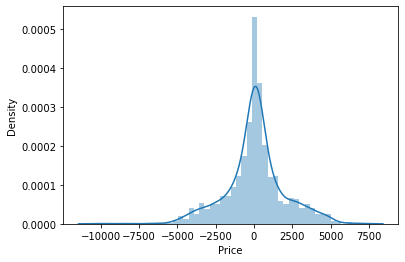

In [319]:
#checking distribution on the test dataset
sns.distplot(rfc.predict(x_test) - y_test)